In [3]:
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
filename="example.csv"
#inputrate=100E3
daqclock=60E6
#runname = filename[11:-4]

In [12]:
df = pd.read_csv(filename)
df.columns
df["Time2"].replace({0:np.nan})
df.head()

,EventNr,nHits,Timestamp1,Timestamp2,Time1,Time2
0,0,2,30691607701,30691607697,511.527,511.527
1,1,2,30692080198,30692080198,511.535,511.535
2,2,2,30692552698,30692552698,511.543,511.543
3,3,2,30693025196,30693025196,511.550,511.550
4,4,2,30693497698,30693497697,511.558,511.558


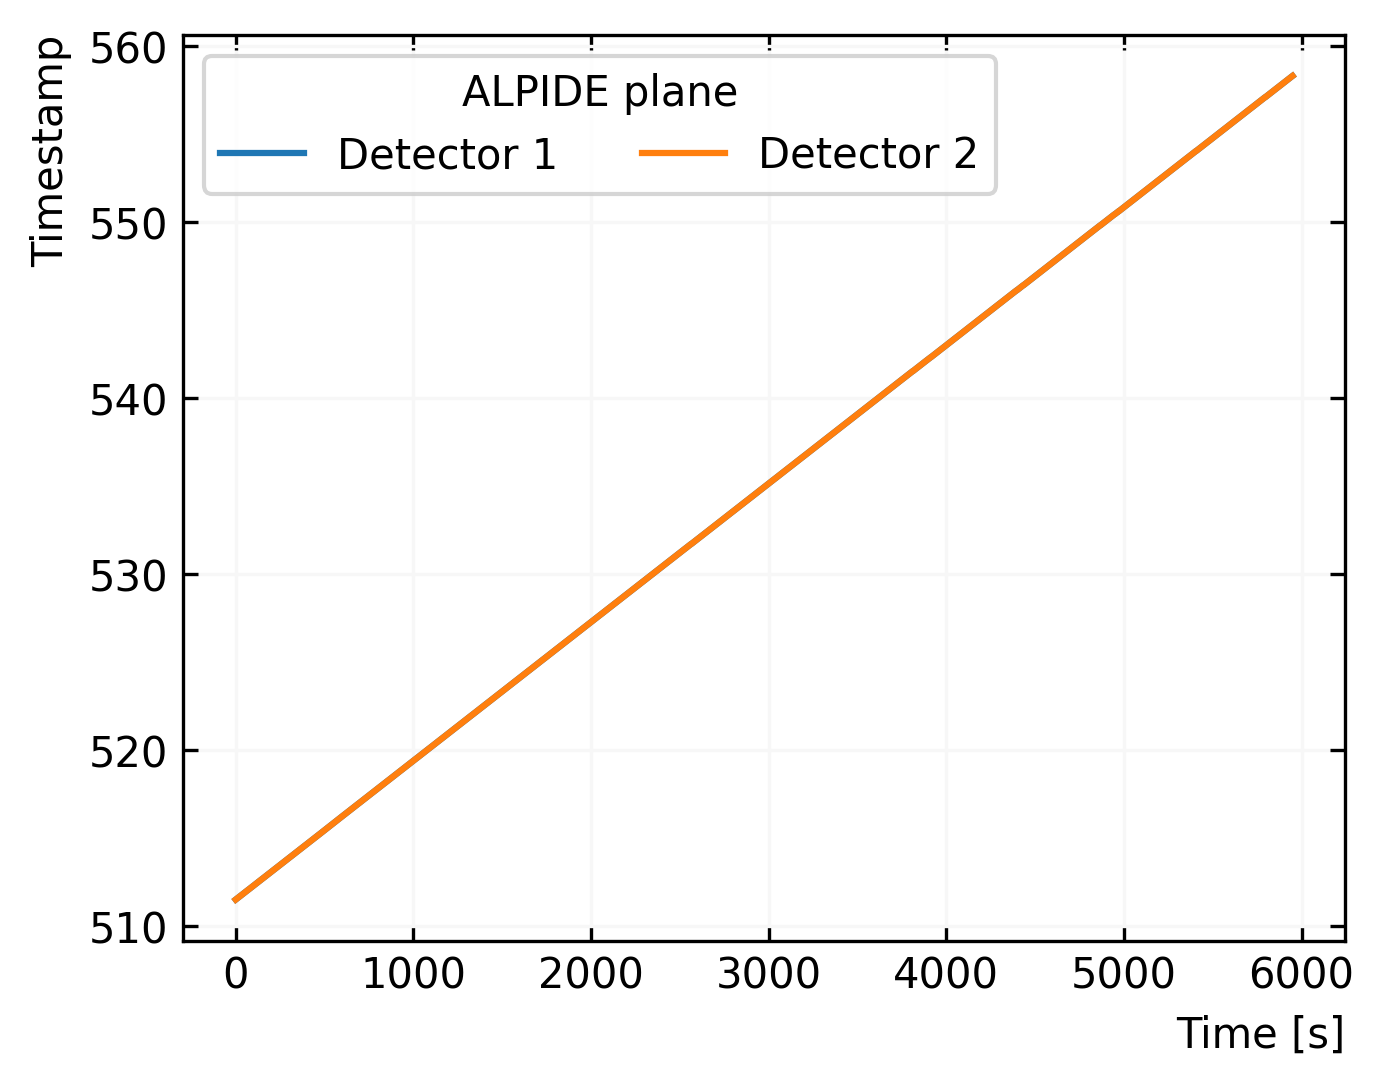

In [16]:
plt.figure(figsize=(5,4),dpi=300)

ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)

df.plot(x="EventNr",y="Time1",ax=ax,label="Detector 1")
df[df["Time2"]>0].plot(x="EventNr",y="Time2",ax=ax,label="Detector 2")
    
ax.set_xlabel("Time [s]",horizontalalignment="right",x=1.0)
ax.set_ylabel("Timestamp",horizontalalignment="right",y=1.0)
ax.legend(title="ALPIDE plane",ncols=2)

plt.grid(visible=True,which="both",axis='both', color='0.97')
#plt.savefig(runname+"_timestamps_vs_time.png")

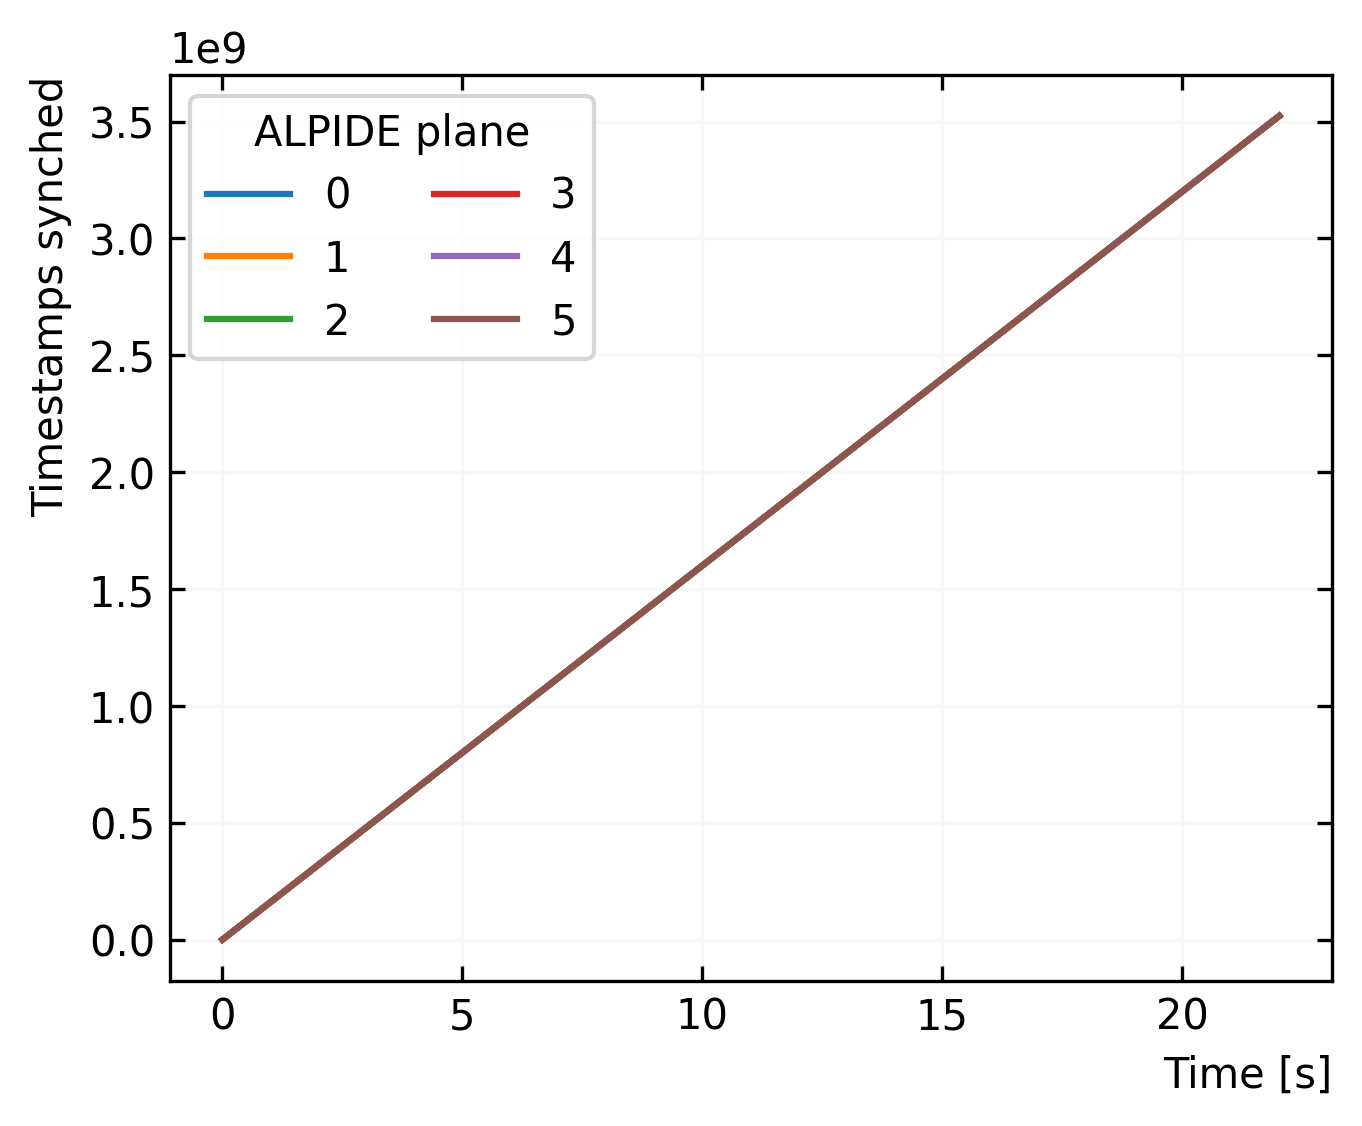

In [6]:
plt.figure(figsize=(5,4),dpi=300)
ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)

for daq in daqs:
    df.plot(x="time",y=(daq+"_zero"),ax=ax,label=daq[-1])
    
ax.set_xlabel("Time [s]",horizontalalignment="right",x=1.0)
ax.set_ylabel("Timestamps synched",horizontalalignment="right",y=1.0)
ax.legend(title="ALPIDE plane",ncols=2)

plt.grid(visible=True,which="both",axis='both', color='0.97')
plt.savefig(runname+"_synched_vs_time.png")

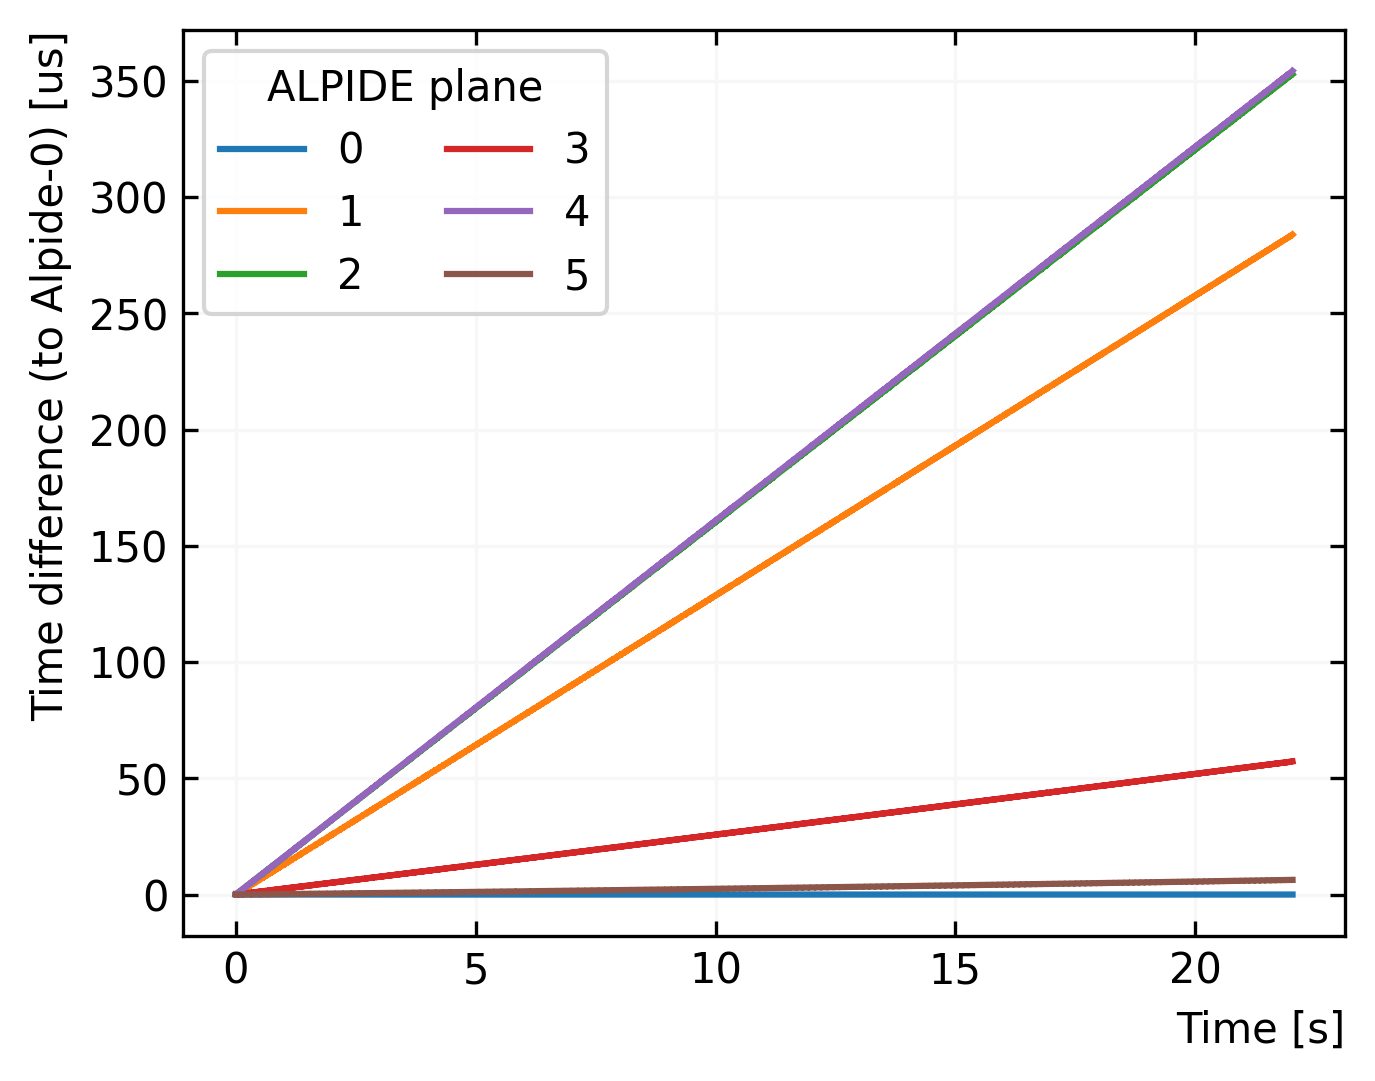

In [7]:
plt.figure(figsize=(5,4),dpi=300)
ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)

for daq in daqs:
    df.plot(x="time",y=(daq+"_diff"),ax=ax,label=daq[-1])
    
ax.set_xlabel("Time [s]",horizontalalignment="right",x=1.0)
ax.set_ylabel("Time difference (to Alpide-0) [us]",horizontalalignment="right",y=1.0)
ax.legend(title="ALPIDE plane",ncols=2)

plt.grid(visible=True,which="both",axis='both', color='0.97')
plt.savefig(runname+"_difference_vs_time.png")

In [8]:
tmp_range = df["ALPIDE_plane_0"][len(df.index)-1] - df["ALPIDE_plane_0"][0]
run_time = tmp_range / daqclock
lag = df["ALPIDE_plane_2_diff"][len(df.index)-1] / daqclock
run_time

44.052136275

In [26]:
diffs = df.ALPIDE_plane_0.diff().to_numpy()

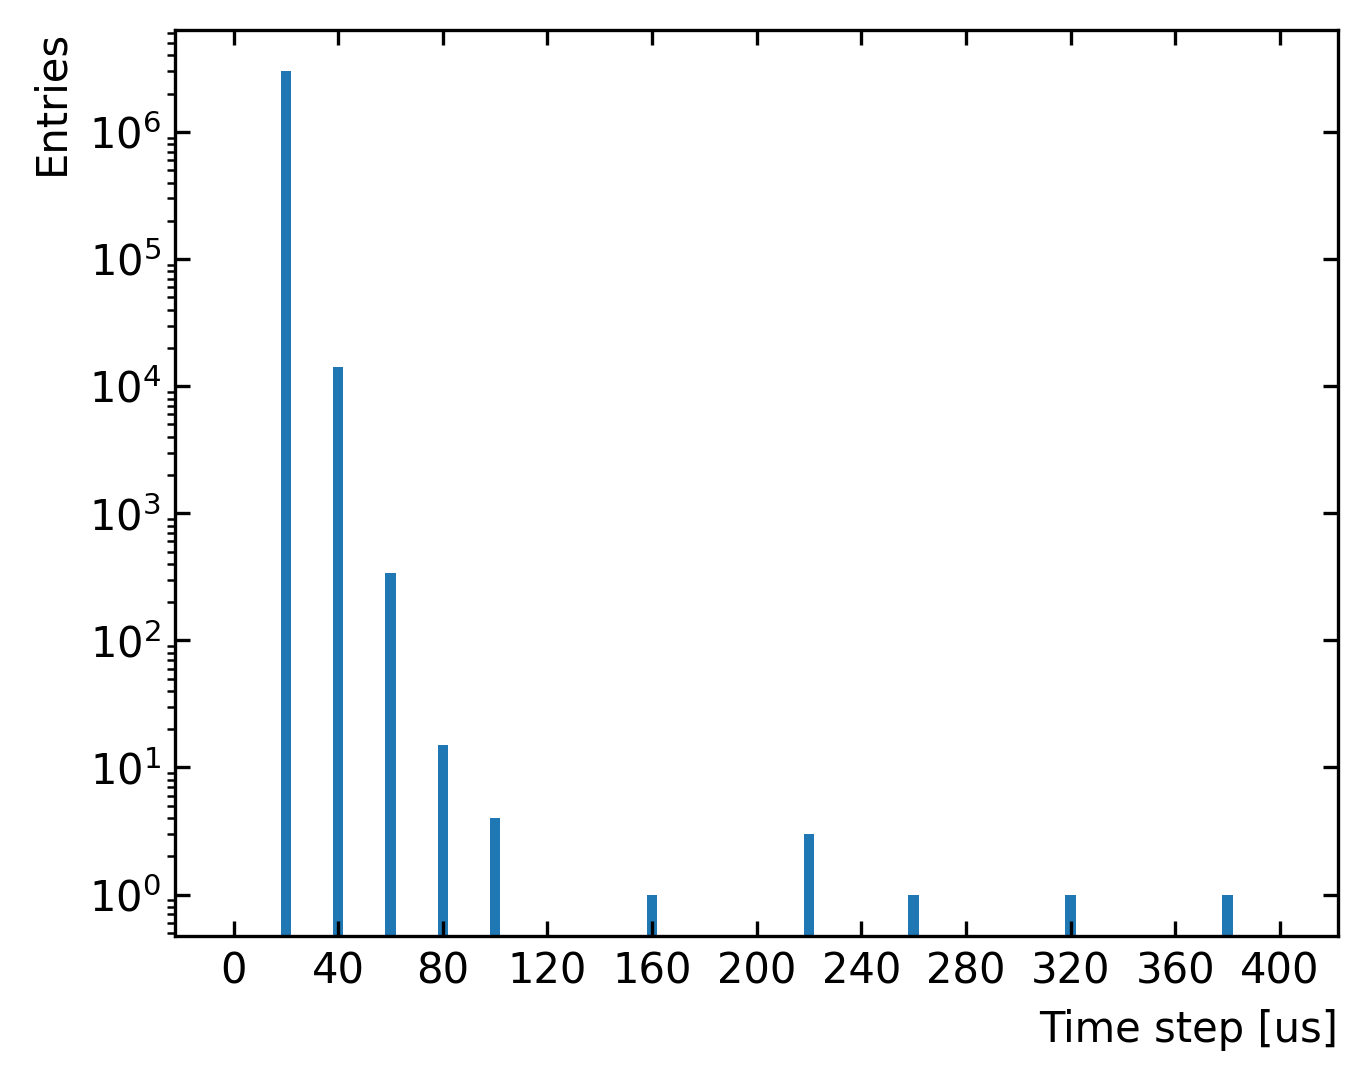

In [27]:
plt.figure(figsize=(5,4),dpi=300)
ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)
plt.hist(diffs/40,101,[-2,402])

ax.set_xlabel("Time step [us]",horizontalalignment="right",x=1.0)
ax.set_ylabel("Entries",horizontalalignment="right",y=1.0)
#ax.set_xlim([0,4000])
plt.xticks(np.arange(0, 440, 40))
ax.set_yscale("log")
plt.savefig(runname+"_timesteps.png")

In [11]:
daqclock/diffs[1:].mean()

50000.39013431478

In [12]:
df.index

RangeIndex(start=0, stop=2202625, step=1)